In [17]:
import pandas as pd
import numpy as np

df = pd.read_excel("DoorDash Interview_ 2024 New Verticals Analytics Exercise.xlsx", header=1)

In [18]:
df.head()

,DELIVERY_UUID,DELIV_CREATED_AT,DELIV_STORE_NAME,DELIV_DASHER_ID,DELIV_SUBMARKET,DELIV_D2R,DELIV_IS_20_MIN_LATE,DELIV_CLAT,DELIV_CANCELLED_AT,DELIV_MISSING_INCORRECT_REPORT,WAS_REQUESTED,WAS_MISSING,WAS_SUBBED,WAS_FOUND,ITEM_NAME,ITEM_PRICE,ITEM_CATEGORY,SUBSTITUTE_ITEM_NAME,SUBSTITUTE_ITEM_CATEGORY
0,9140e853-ea67-4eee-ba76-85fafcc7da6d,2022-10-14 23:59:09,Grocery1,16990594.0,Cincinnati,0.083333,0,0.366667,NaT,False,1,0,0,1,Cupcake Pinot Grigio (750 ml),8.99,Alcohol,NaN,NaN
1,9140e853-ea67-4eee-ba76-85fafcc7da6d,2022-10-14 23:59:09,Grocery1,16990594.0,Cincinnati,0.083333,0,0.366667,NaT,False,1,0,0,1,Meijer Tomato Paste No Salt Added (6 oz),0.90,Pantry,NaN,NaN
2,9140e853-ea67-4eee-ba76-85fafcc7da6d,2022-10-14 23:59:09,Grocery1,16990594.0,Cincinnati,0.083333,0,0.366667,NaT,False,1,0,0,1,Pillsbury Ready To Bake! Cookie Dough Chocolat...,4.25,Bakery,NaN,NaN
3,9140e853-ea67-4eee-ba76-85fafcc7da6d,2022-10-14 23:59:09,Grocery1,16990594.0,Cincinnati,0.083333,0,0.366667,NaT,False,1,0,0,1,Meijer Ultra Pasteurized Heavy Whipping Cream ...,4.05,Dairy & Eggs,NaN,NaN
4,9140e853-ea67-4eee-ba76-85fafcc7da6d,2022-10-14 23:59:09,Grocery1,16990594.0,Cincinnati,0.083333,0,0.366667,NaT,False,1,0,0,1,Maruchan Chicken Flavor Ramen Noodle Soup Box ...,3.95,Pantry,NaN,NaN


In [20]:
df.shape

(60583, 19)

In [21]:
orders = df.groupby("DELIVERY_UUID").agg({
    "ORDER_CREATED_HOUR": "first",
    "TOTAL_PRICE": "sum",
    "SUBTOTAL": "sum",
    "NUM_ITEMS": "sum",
    "DASHEE_TIP": "sum",
    "DELIVERY_DISTANCE_MILES": "first",
    "REGION": "first",
    "CATEGORY": "nunique",  # number of unique categories in the order
    "ITEM_NAME": "nunique"  # number of unique items in the order
}).reset_index()


KeyError: "Column(s) ['CATEGORY', 'DASHEE_TIP', 'DELIVERY_DISTANCE_MILES', 'NUM_ITEMS', 'ORDER_CREATED_HOUR', 'REGION', 'SUBTOTAL', 'TOTAL_PRICE'] do not exist"

In [22]:
df.columns.tolist()


['DELIVERY_UUID',
 'DELIV_CREATED_AT',
 'DELIV_STORE_NAME',
 'DELIV_DASHER_ID',
 'DELIV_SUBMARKET',
 'DELIV_D2R',
 'DELIV_IS_20_MIN_LATE',
 'DELIV_CLAT',
 'DELIV_CANCELLED_AT',
 'DELIV_MISSING_INCORRECT_REPORT',
 'WAS_REQUESTED',
 'WAS_MISSING',
 'WAS_SUBBED',
 'WAS_FOUND',
 'ITEM_NAME',
 'ITEM_PRICE',
 'ITEM_CATEGORY',
 'SUBSTITUTE_ITEM_NAME',
 'SUBSTITUTE_ITEM_CATEGORY']

In [23]:
orders = df.groupby("DELIVERY_UUID").agg({
    "DELIV_CREATED_AT": "first",
    "DELIV_SUBMARKET": "first",
    "DELIV_D2R": "first",  # delivery distance, I believe
    "ITEM_NAME": "nunique",  # number of unique items
    "ITEM_CATEGORY": "nunique",  # number of unique categories
    "ITEM_PRICE": "sum"  # total cost of items
}).reset_index()

orders.rename(columns={
    "DELIV_CREATED_AT": "created_at",
    "DELIV_SUBMARKET": "region",
    "DELIV_D2R": "delivery_distance",
    "ITEM_NAME": "num_unique_items",
    "ITEM_CATEGORY": "num_unique_categories",
    "ITEM_PRICE": "order_total"
}, inplace=True)


In [24]:
orders.head()


,DELIVERY_UUID,created_at,region,delivery_distance,num_unique_items,num_unique_categories,order_total
0,000b3220-d3c4-47f9-8e84-b072ebc2298c,2022-10-03 04:08:19,Cincinnati,0.050000,8,5,26.22
1,0011f3fa-8458-4448-809a-c1a7204d77b3,2022-10-03 01:59:03,Cincinnati,2.033333,6,3,21.54
2,0012e0a2-efb5-4f24-88df-32e4cc089bb4,2022-10-10 01:58:07,Cincinnati,0.083333,1,1,2.49
3,001bf161-b895-4621-9747-f715e6c10898,2022-10-07 20:56:08,Cincinnati,0.033333,1,1,22.49
4,0024913d-12e5-4b1b-b7bf-3ad09fa227bf,2022-10-03 12:17:52,Cincinnati,1.950000,4,1,15.25


Matplotlib is building the font cache; this may take a moment.


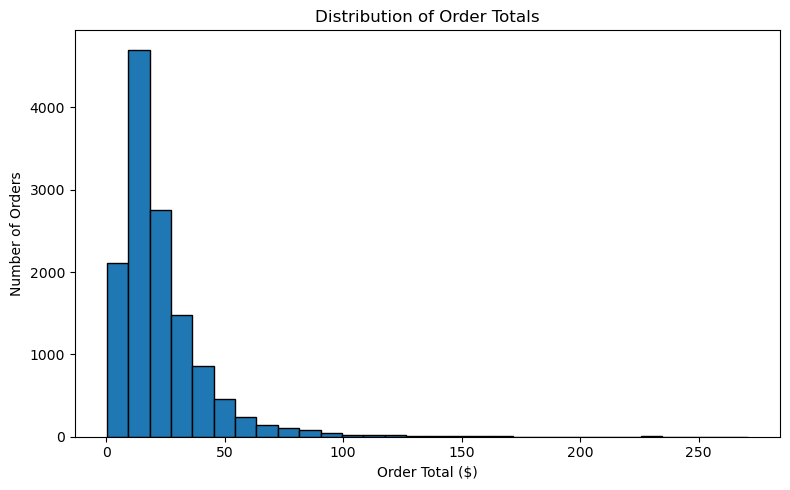

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(orders["order_total"], bins=30, edgecolor='black')
plt.title("Distribution of Order Totals")
plt.xlabel("Order Total ($)")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.savefig("fig1_order_totals.png", dpi=300)
plt.show()


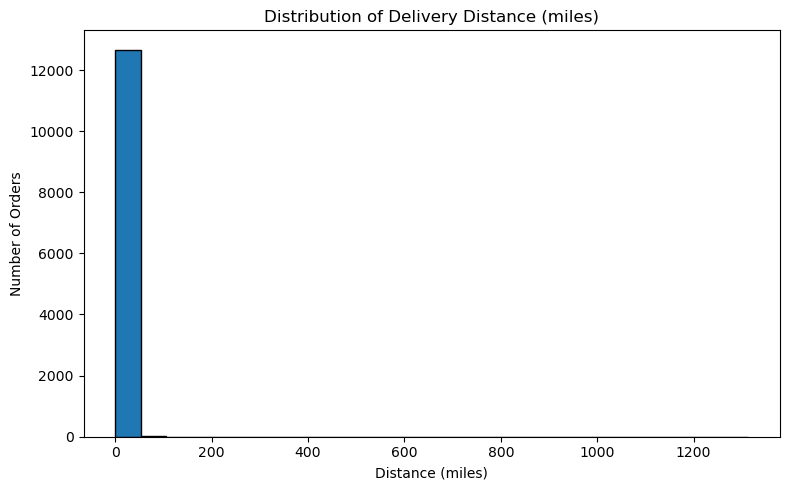

In [26]:
plt.figure(figsize=(8, 5))
plt.hist(orders["delivery_distance"], bins=25, edgecolor='black')
plt.title("Distribution of Delivery Distance (miles)")
plt.xlabel("Distance (miles)")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.savefig("fig2_delivery_distance.png", dpi=300)
plt.show()


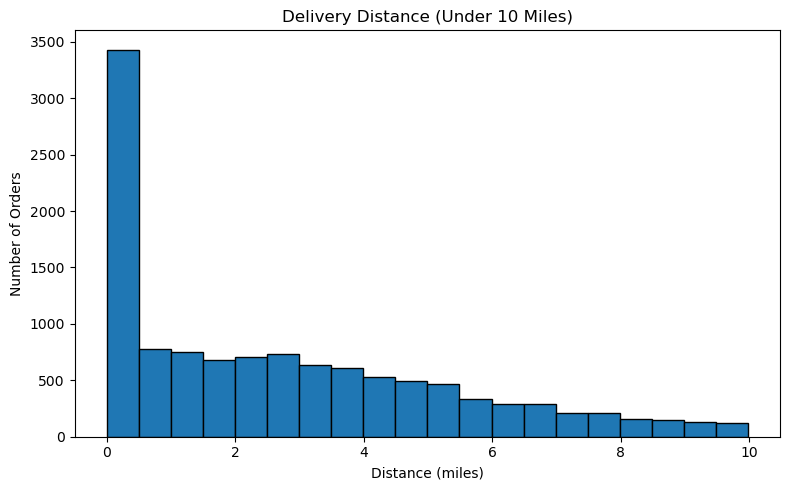

In [27]:
plt.figure(figsize=(8, 5))
plt.hist(orders[orders["delivery_distance"] < 10]["delivery_distance"], bins=20, edgecolor='black')
plt.title("Delivery Distance (Under 10 Miles)")
plt.xlabel("Distance (miles)")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.savefig("fig2b_short_delivery_distance.png", dpi=300)
plt.show()


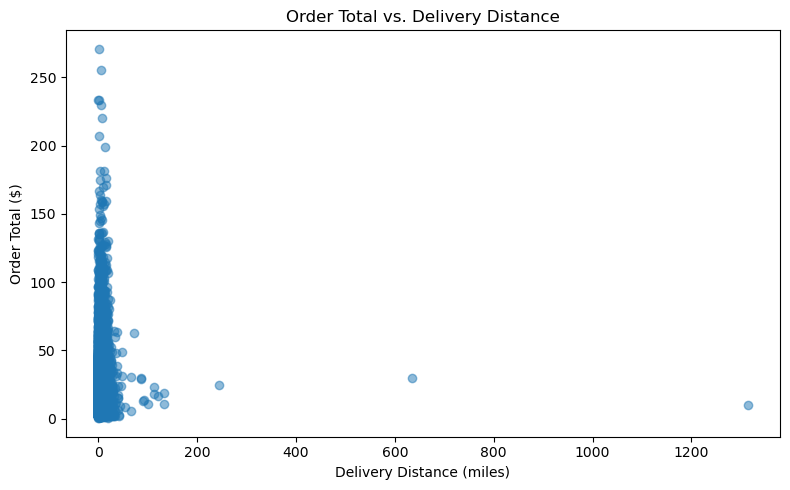

In [28]:
plt.figure(figsize=(8, 5))
plt.scatter(orders["delivery_distance"], orders["order_total"], alpha=0.5)
plt.title("Order Total vs. Delivery Distance")
plt.xlabel("Delivery Distance (miles)")
plt.ylabel("Order Total ($)")
plt.tight_layout()
plt.savefig("fig3_distance_vs_total.png", dpi=300)
plt.show()


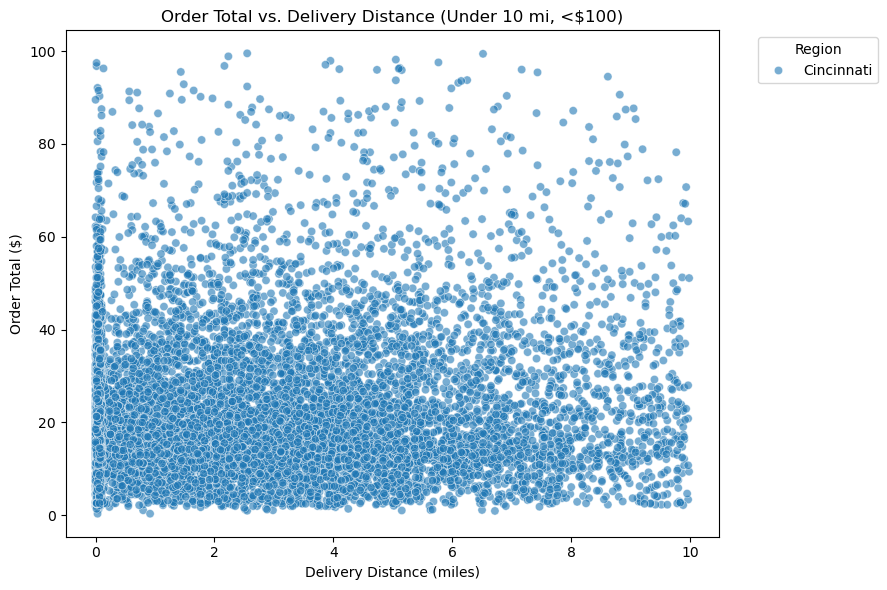

In [29]:
import seaborn as sns

# Optional: install seaborn if it's not in your env
# conda install -c conda-forge seaborn

# Filter out extreme values for clarity
filtered_orders = orders[(orders["delivery_distance"] < 10) & (orders["order_total"] < 100)]

plt.figure(figsize=(9, 6))
sns.scatterplot(
    data=filtered_orders,
    x="delivery_distance",
    y="order_total",
    hue="region",
    alpha=0.6
)

plt.title("Order Total vs. Delivery Distance (Under 10 mi, <$100)")
plt.xlabel("Delivery Distance (miles)")
plt.ylabel("Order Total ($)")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("fig4_cleaned_distance_vs_total.png", dpi=300)
plt.show()